<a href="https://colab.research.google.com/github/ofelipevilela/Metodos-Discretos/blob/main/Atividade_9_PVI_de_Segunda_Ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FELIPE DA COSTA PINTO VILELA
#(202465557B)

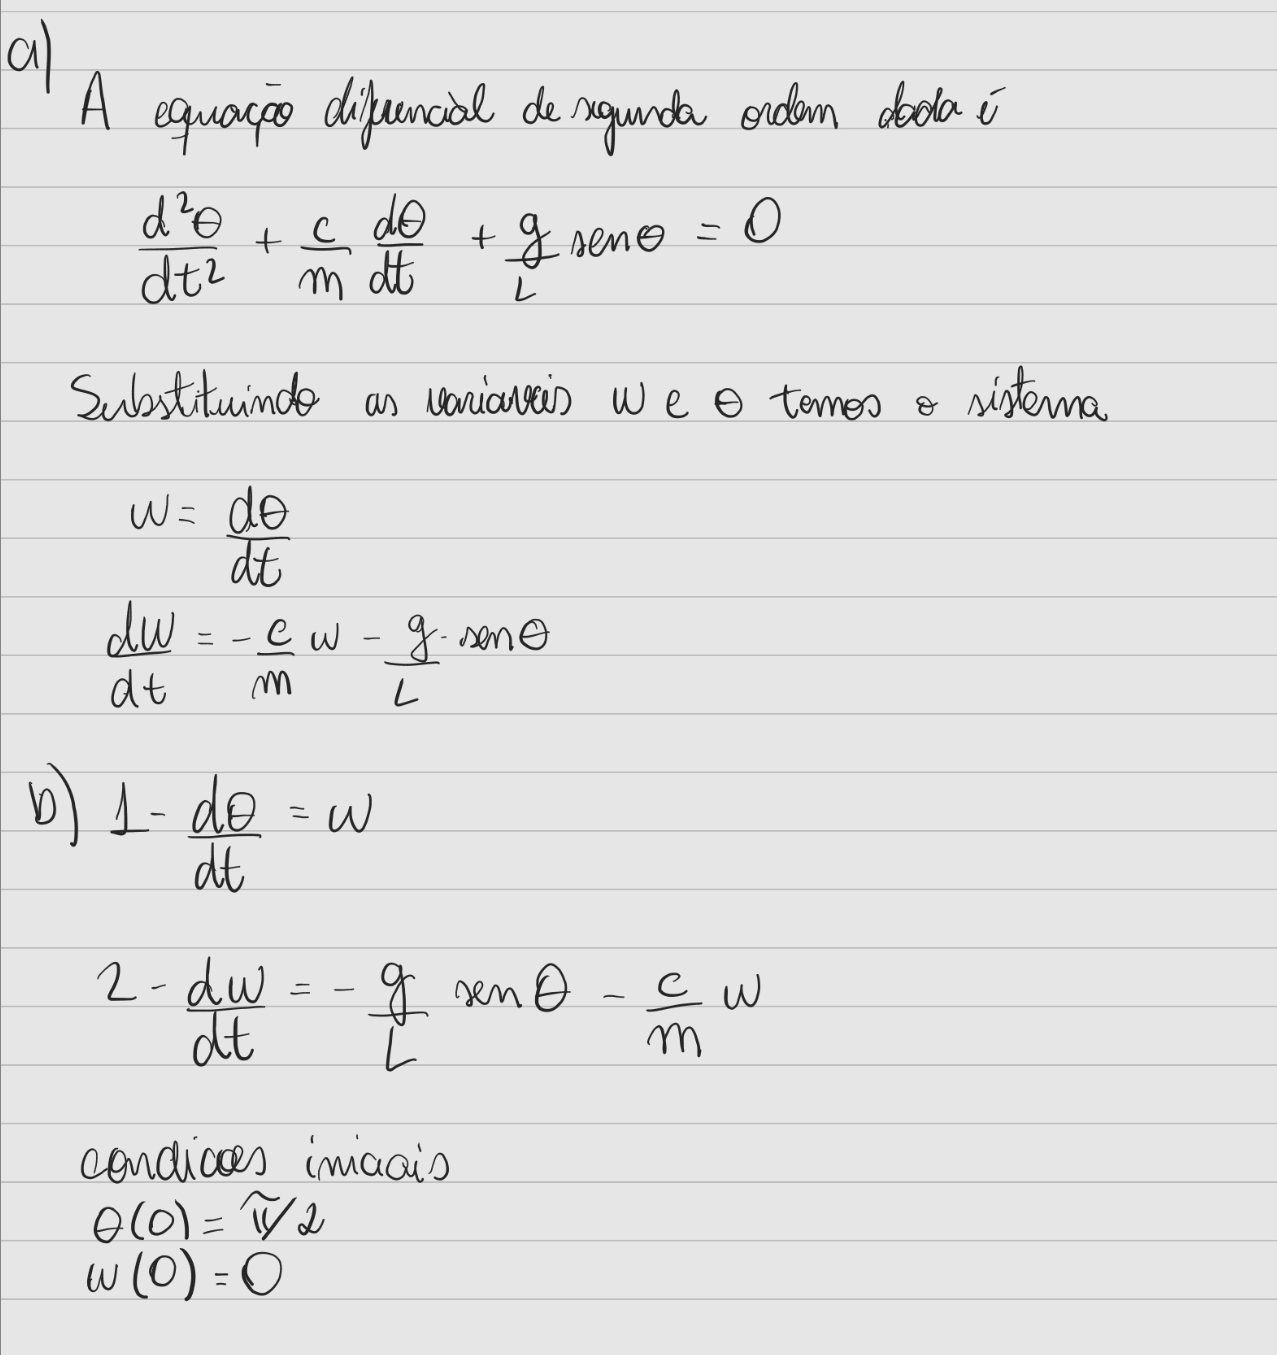

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definindo as constantes
g = 9.81  # m/s^2
L = 1.2   # m
c = 0.16  # N·s/m
m = 0.5   # kg


In [ ]:
# Funções para o sistema de equações diferenciais de primeira ordem
def dtheta_dt(w):
    return w

def dw_dt(theta, w):
    return - (c / m) * w - (g / L) * np.sin(theta)

# Método de Runge-Kutta de quarta ordem
def runge_kutta_4th_order(theta0, w0, t0, tf, h):
    n = int((tf - t0) / h) + 1  # Número de passos
    t = np.linspace(t0, tf, n)

    theta = np.zeros(n)
    w = np.zeros(n)

    # Condições iniciais
    theta[0] = theta0
    w[0] = w0

    # Método de Runge-Kutta de 4ª ordem
    for i in range(1, n):
        k1_theta = h * dtheta_dt(w[i-1])
        k1_w = h * dw_dt(theta[i-1], w[i-1])

        k2_theta = h * dtheta_dt(w[i-1] + 0.5 * k1_w)
        k2_w = h * dw_dt(theta[i-1] + 0.5 * k1_theta, w[i-1] + 0.5 * k1_w)

        k3_theta = h * dtheta_dt(w[i-1] + 0.5 * k2_w)
        k3_w = h * dw_dt(theta[i-1] + 0.5 * k2_theta, w[i-1] + 0.5 * k2_w)

        k4_theta = h * dtheta_dt(w[i-1] + k3_w)
        k4_w = h * dw_dt(theta[i-1] + k3_theta, w[i-1] + k3_w)

        theta[i] = theta[i-1] + (1/6) * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
        w[i] = w[i-1] + (1/6) * (k1_w + 2*k2_w + 2*k3_w + k4_w)

    return t, theta, w


In [ ]:
# Condições iniciais
theta0 = np.pi / 2  # 90 graus
w0 = 0  # Velocidade inicial
t0 = 0  # Tempo inicial
tf = 8  # Tempo final
h = 0.1  # Passo

# Resolvendo o sistema de EDOs
t, theta, w = runge_kutta_4th_order(theta0, w0, t0, tf, h)

In [ ]:
# Imprimindo os valores de θ(t) para t = 2, 4, 6, 8 segundos
for i, ti in enumerate(t):
    if ti in [2, 4, 6, 8]:
        print(f"t = {ti:.1f} s: θ(t) = {theta[i]:.4f} rad")

# Convertendo θ(t) de radianos para graus
theta_deg = np.degrees(theta)

t = 2.0 s: θ(t) = 0.3120 rad
t = 4.0 s: θ(t) = -0.4561 rad
t = 6.0 s: θ(t) = -0.5548 rad
t = 8.0 s: θ(t) = -0.3735 rad


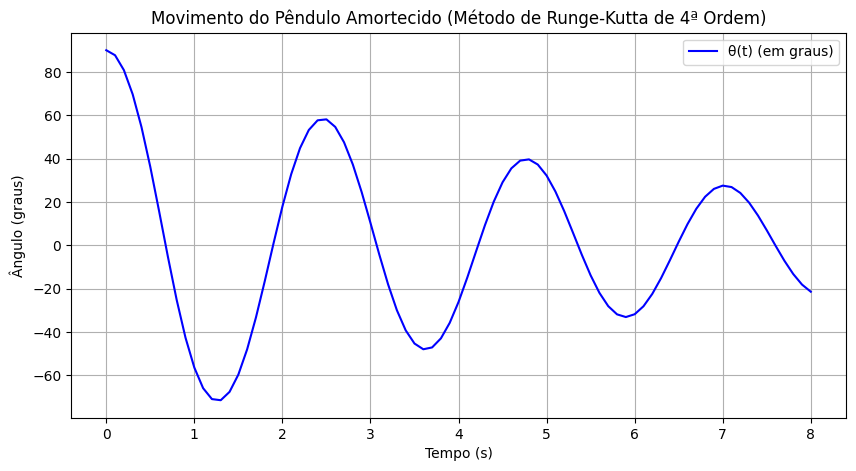

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(t, theta_deg, label="θ(t) (em graus)", color='b')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo (graus)')
plt.title('Movimento do Pêndulo Amortecido (Método de Runge-Kutta de 4ª Ordem)')
plt.grid(True)
plt.legend()
plt.show()